# 1 Hipotesys Conceitual Formula

In [ ]:
# Import libs

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
# Read data from a CSV file named "IM_230626_semNP.csv" and store it in a DataFrame called df_informe_mensal.
df_informe_mensal = pd.read_csv("IM_230626_semNP.csv")


#### 1.1 Formula that returns "inadimplência percentual"

In [ ]:
# Drop rows with missing values in the "Patrimonio_Liquido" column and store the cleaned DataFrame in df_cleaned.
df_cleaned = df_informe_mensal.dropna(subset=["Patrimonio_Liquido"])

# Extract the "Carteira_Direitos_Aquisicao_Inadimplentes" column from the cleaned DataFrame.
inadimplentes = df_cleaned["Carteira_Direitos_Aquisicao_Inadimplentes"]

# Extract the "Patrimonio_Liquido" column from the cleaned DataFrame.
patrimonio_liquido = df_cleaned["Patrimonio_Liquido"]

# Calculate the default rate by dividing the number of inadimplentes by the patrimonio_liquido.
taxa_inadimplencia = inadimplentes / patrimonio_liquido

# Display the calculated default rate.
taxa_inadimplencia

# Add a new column named "taxa_inadimplencia_series" to the original df_informe_mensal DataFrame
# and assign it the values of the calculated default rate.
df_informe_mensal = df_informe_mensal.assign(taxa_inadimplencia_series=taxa_inadimplencia)


##### Correlation that proves that the formula is conceptual, given that the elements of the formula are related, but the calculated column of the formula is not directly related

In [ ]:
# List to store the columns that will be kept in the new DataFrame.
colunas_mantidas = []

# Iterate through all columns in the df_informe_mensal DataFrame.
for coluna in df_informe_mensal.columns:
    # Check if the column does not end with "_Dias" and does not start with "Taxas".
    if not coluna.endswith("_Dias") and not coluna.startswith("Taxas"):
        colunas_mantidas.append(coluna)

# Create a new DataFrame, df_informe_geral, containing only the columns stored in colunas_mantidas.
df_informe_geral = df_informe_mensal[colunas_mantidas]

# Assuming you have already loaded a DataFrame named "df_informe_geral".

# Sum the columns Numero_Cotistas_Senior and create a new column 'cotistas_senior'.
df_informe_geral['cotistas_senior'] = df_informe_geral.filter(like='Numero_Cotistas_Senior').sum(axis=1)

# Sum the columns Numero_Cotistas_Subordinada and create a new column 'cotistas_subordinados'.
df_informe_geral['cotistas_subordinados'] = df_informe_geral.filter(like='Numero_Cotistas_Subordinada').sum(axis=1)

# List of columns to eliminate based on a pattern.
colunas_eliminar = df_informe_geral.columns[df_informe_geral.columns.str.contains('([0-9_]Dias$|^Taxa)')]

# Drop the specified columns from the df_informe_geral DataFrame.
df_informe_geral = df_informe_geral.drop(columns=colunas_eliminar)

# Display the list of columns in the modified df_informe_geral DataFrame.
df_informe_geral.shape


In [ ]:
# List of columns to remove from the DataFrame df_informe_geral
remove = ['ID_Participante', 'ID_Documento', 'SK_Documento', 'CNPJ', 'Data_Competencia', 'Data_Entrega', 'CNPJ_Administrador', 'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo', 'Cotistas_Vinculados_Interesse']
clean_df = ['Garantias_Valor_Total', 'Garantias_Percentual', 'Carteira_Direitos_Sem_Aquisicao_Prazo_1_30_dias', 'Carteira_Direitos_Aquisicao_Prazo_1_30_dias', 'Prazo_Pagamento_Resgate', 'Tipo_Prazo_Pagamento_Resgate']
carteira_remove = [ 'Carteira_Industrial',
 'Carteira_Mercado_Imobiliario',
 'Carteira_Comercial_Total',
 'Carteira_Comercial',
 'Carteira_Comercial_Varejo',
 'Carteira_Arrendamento_Mercantil',
 'Carteira_Servicos_Total',
 'Carteira_Servicos',
 'Carteira_Servicos_Publicos',
 'Carteira_Servicos_Educacionais',
 'Carteira_Entretenimento',
 'Carteira_Agronegocio',
 'Carteira_Financeiro',
 'Carteira_Credito Pessoal',
 'Carteira_Credito_Pessoal_Consignado',
 'Carteira_Credito_Corporativo',
 'Carteira_Middle_Market',
 'Carteira_Veiculos',
 'Carteira_Imobiliaria_Empresarial',
 'Carteira_Imobiliaria_Residencial',
 'Carteira_Outros_Financeiro',
 'Carteira_Cartao_Credito',
 'Carteira_Factoring',
 'Carteira_Factoring_Pessoal',
 'Carteira_Factoring_Corporativo',
 'Carteira_Setor_Publico',
 'Carteira_Precatorios',
 'Carteira_Creditos_Tributarios',
 'Carteira_Royalties',
 'Carteira_Outros_Setor_Publico',
 'Carteira_Acoes_Judiciais',
 'Carteira_Propriedade_Intelectual',]
passivo_remove = ['Passivo_A_Pagar',
 'Passivo_Curto_Prazo',
 'Passivo_Longo_Prazo',
 'Passivo_Posicao_Derivativos',
 'Passivo_Mercado_Termo',
 'Passivo_Mercado_Opcoes',
 'Passivo_Mercado_Futuro',
 'Passivo_Diferencial_Swap',]
ativo_remove = [
 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Performar',
 'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes',
 'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao',
 'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas',
 'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais',
 'Ativo_Direitos_Aquisicao_Creditos_Fator_Risco',
 'Ativo_Direitos_Aquisicao_Creditos_Diversos',
 'Ativo_Direitos_Aquisicao_Provisao_Reducao',
 'Ativo_Direitos_Sem_Aquisicao',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Adimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Inadimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Parcelas_Inadimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Inadimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Performar',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencidos_Pendentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Empresas_Recuperacao',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Receitas_Publicas',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Acoes_Judiciais',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Fator_Risco',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Diversos',
 'Ativo_Direitos_Sem_Aquisicao_Provisao_Reducao',
 'Ativo_Valores_Mobiliarios',
 'Ativo_Debentures',
 'Ativo_CRI',
 'Ativo_Notas_Promissorias',
 'Ativo_Letras Financeiras',
 'Ativo_Cotas_Fundos_ICVM_555',
 'Ativo_Outros_Valores_Mobiliarios',
 'Ativo_Titulos_Federais',
 'Ativo_CDB',
 'Ativo_Operacoes_Compromissadas',
 'Ativo_Outros_Ativos_Renda_Fixa',
 'Ativo_Cotas_FIDC',
 'Ativo_Cotas_FIDC_NP',
 'Ativo_Warrants',
 'Ativo_Provisao_Debentures_CRI_NP_LF',
 'Ativo_Provisao_Cotas_FIDC',
 'Ativo_Provisao_Outros_Ativos',
 'Ativo_Posicao_Derivativos',
 'Ativo_Mercado_Termo',
 'Ativo_Mercado_Opcoes',
 'Ativo_Mercado_Futuro',
 'Ativo_Diferencial_Swap',
 'Ativo_Coberturas_Prestadas',
 'Ativo_Depositos_Margem',
 'Ativo_Outros',
 'Ativo_Curto_Prazo',
 'Ativo_Longo Prazo',]
negocios_remove = ['Negocios_Aquisicoes_Direitos_Aquisicao_Quantidade',
 'Negocios_Aquisicoes_Direitos_Aquisicao_Valor',
 'Negocios_Aquisicoes_Direitos_Sem_Aquisicao_Quantidade',
 'Negocios_Aquisicoes_Direitos_Sem_Aquisicao_Valor',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Adimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Adimplentes_Valor',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Inadimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Inadimplentes_Valor',
 'Negocios_Aquisicoes_Direitos_Inadimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Inadimplentes_Valor',
 'Negocios_Alienacoes_Cedente_Quantidade',
 'Negocios_Alienacoes_Cedente_Valor',
 'Negocios_Alienacoes_Cedente_Valor_Contabil',
 'Negocios_Alienacoes_Prestadores_Quantidade',
 'Negocios_Alienacoes_Prestadores_Valor',
 'Negocios_Alienacoes_Prestadores_Valor_Contabil',
 'Negocios_Alienacoes_Terceiros_Quantidade',
 'Negocios_Alienacoes_Terceiros_Valor',
 'Negocios_Alienacoes_Terceiros_Valor_Contabil',
 'Negocios_Substituicoes_Quantidade',
 'Negocios_Substituicoes_Valor',
 'Negocios_Substituicoes_Valor_Contabil',
 'Negocios_Recompras_Quantidade',
 'Negocios_Recompras_Valor',
 'Negocios_Recompras_Valor_Contabil']
cotistas_tipo = ['Numero_Cotistas_Senior_Pessoa_Fisica',
 'Numero_Cotistas_Senior_Pessoa_Juridica_Nao_Financeira',
 'Numero_Cotistas_Senior_Banco_Comercial',
 'Numero_Cotistas_Senior_Corretora_Distribuidora',
 'Numero_Cotistas_Senior_Pessoa_Juridica_Financeira',
 'Numero_Cotistas_Senior_Investidor_Nao_Residente',
 'Numero_Cotistas_Senior_Entidade_Aberta_Previdencia_Complementar',
 'Numero_Cotistas_Senior_Entidade_Fechada_Previdencia_Complementar',
 'Numero_Cotistas_Senior_Regime_Proprio_Previdencia_Servidores_Publicos',
 'Numero_Cotistas_Senior_Sociedade_Seguradora',
 'Numero_Cotistas_Senior_Sociedade_Capitalizacao',
 'Numero_Cotistas_Senior_FIC_FIDC',
 'Numero_Cotistas_Senior_FII',
 'Numero_Cotistas_Senior_Outros_Fundos',
 'Numero_Cotistas_Senior_Clube_Investimento',
 'Numero_Cotistas_Senior_Outros',
 'Numero_Cotistas_Subordinada_Pessoa_Fisica',
 'Numero_Cotistas_Subordinada_Pessoa_Juridica_Nao_Financeira',
 'Numero_Cotistas_Subordinada_Banco_Comercial',
 'Numero_Cotistas_Subordinada_Corretora_Distribuidora',
 'Numero_Cotistas_Subordinada_Pessoa_Juridica_Financeira',
 'Numero_Cotistas_Subordinada_Investidor_Nao_Residente',
 'Numero_Cotistas_Subordinada_Entidade_Aberta_Previdencia_Complementar',
 'Numero_Cotistas_Subordinada_Entidade_Fechada_Previdencia_Complementar',
 'Numero_Cotistas_Subordinada_Regime_Proprio_Previdencia_Servidores_Publicos',
 'Numero_Cotistas_Subordinada_Sociedade_Seguradora',
 'Numero_Cotistas_Subordinada_Sociedade_Capitalizacao',
 'Numero_Cotistas_Subordinada_FIC_FIDC',
 'Numero_Cotistas_Subordinada_FII',
 'Numero_Cotistas_Subordinada_Outros_Fundos',
 'Numero_Cotistas_Subordinada_Clube_Investimento',
 'Numero_Cotistas_Subordinada_Outros',]
# Remove the specified columns from the df_informe_geral DataFrame.
df_informe_relacao = df_informe_geral.drop(remove + clean_df + carteira_remove + passivo_remove + ativo_remove + negocios_remove + cotistas_tipo, axis=1)
# Display the first few rows of the DataFrame df_informe_relacao after the removal.
df_informe_relacao.head()

In [ ]:
# Calculate the correlation matrix for the DataFrame df_informe_relacao.
correlation_matrix = df_informe_relacao.corr()

# Configure the size of the figure for the heatmap.
plt.figure(figsize=(10, 10))

# Create a heatmap using Seaborn, displaying correlation values and formatting.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, annot_kws={"size": 10})

# Set the title of the heatmap.
plt.title('Matriz de Correlação')

# Display the heatmap.
plt.show()

In [ ]:
# Select funds with non-zero default rates and valid default rate values.
fundos_inadimplentes = df_informe_mensal[
    (df_informe_mensal['taxa_inadimplencia_series'] != 0) &
    df_informe_mensal['taxa_inadimplencia_series'].notna()
]

# Extract unique fund names from the filtered dataset.
list(fundos_inadimplentes['Nome_Fundo'].unique())


# 2 Asimodel

### Relationship between inadimplência and fund health

##### Information about a specific FIDC

In [ ]:
print(taxa_inadimplencia)

In [ ]:
# pd.set_option('display.max_columns', None)
valor_especifico_taxa = 8.937104796436373

registro = df_informe_mensal.loc[df_informe_mensal['taxa_inadimplencia_series'] == valor_especifico_taxa]
registro

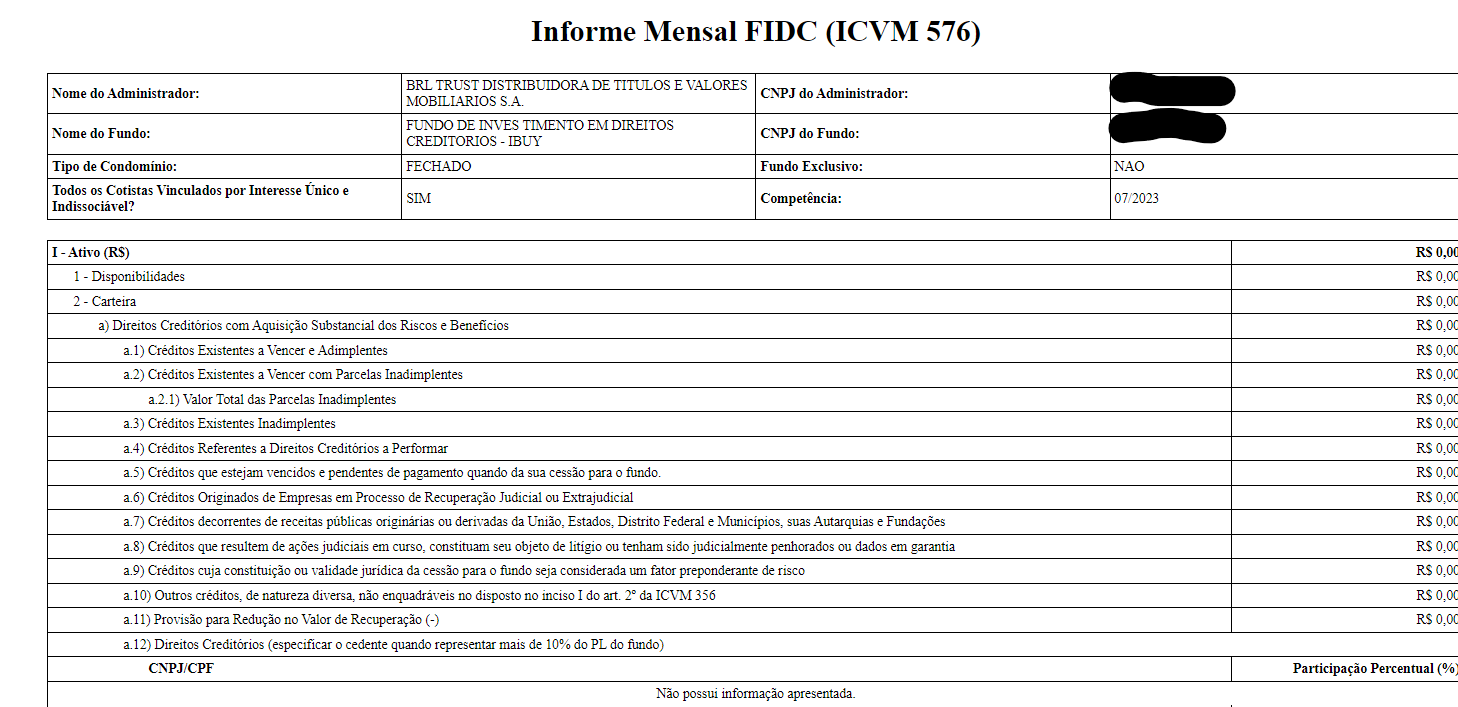

#### Portfolio segmentation analysis

In [ ]:
# List of portfolios to be considered
carteira = [
    'Carteira_Comercial_Varejo',  # Commercial Retail Portfolio
    'Carteira_Credito Pessoal',    # Personal Credit Portfolio
    'Carteira_Credito_Pessoal_Consignado',  # Consigned Personal Credit Portfolio
    'Carteira_Outros_Financeiro',  # Other Financial Portfolio
    'Carteira_Cartao_Credito',     # Credit Card Portfolio
    'Carteira'                     # General Portfolio
]

# Sum the default rate values for each portfolio
summed_data = df_informe_mensal.groupby('taxa_inadimplencia_series')[carteira].sum()

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=summed_data, palette='viridis')
plt.title('Sum of Default Rates by Portfolio')
plt.xlabel('Portfolio')
plt.ylabel('Total Default Rate')
plt.xticks(rotation=45)
plt.legend(title='Portfolio', loc='upper right')

plt.grid(True)
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# Filter funds with default rate above 1.0 and not repeated for the selected portfolio
fundos_validos = df_informe_mensal[(df_informe_mensal['Carteira_Cartao_Credito'] > 1.0) & (df_informe_mensal['Carteira_Cartao_Credito'].notna())]

# Remove duplicates from the fund name, keeping only the first occurrence
fundos_validos = fundos_validos[~fundos_validos['Nome_Fundo'].duplicated(keep='first')]

# Check if there are valid funds before plotting the chart
if not fundos_validos.empty:
    # Prepare data for the line chart
    x = fundos_validos['Nome_Fundo']
    y = fundos_validos['Carteira_Cartao_Credito']

    # Plot the line chart
    plt.figure(figsize=(50, 6))
    plt.plot(x, y, marker='o')
    plt.title('Default Rates for Portfolio "Carteira_Cartao_Credito" (Above 1.0)')
    plt.xlabel('Fund')
    plt.ylabel('Default Rate')
    plt.xticks(rotation=90)
    plt.ylim(1.0, max(y) + 0.1)  # Set the y-axis range
    plt.grid(True)
    plt.tight_layout()

    # Display the chart
    plt.show()
else:
    print('There are no funds with default rates above 1.0 for the "Carteira_Cartao_Credito" portfolio')


#### Classification model by `inadimplência percentual`  

#### Meanshift

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'

# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]

# Prepare data for clustering
X = fundos_validos[[carteira_selecionada]]

# Standardize the data (important for MeanShift)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Creating clusters using MeanShift with specified bandwidth
bandwidth = 1.0  # Ajuste o valor do bandwidth conforme necessário
meanshift = MeanShift(bandwidth=bandwidth)
fundos_validos['grupo'] = meanshift.fit_predict(X)

# Selecione apenas os três primeiros clusters
clusters_selecionados = fundos_validos['grupo'].value_counts().index[:3]
fundos_validos = fundos_validos[fundos_validos['grupo'].isin(clusters_selecionados)]

# Defina cores personalizadas para cada cluster
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}

# Plot the bar chart separating the clusters with custom colors
plt.figure(figsize=(10, 6))
unique_clusters = fundos_validos['grupo'].unique()
for cluster in unique_clusters:
    cluster_df = fundos_validos[fundos_validos['grupo'] == cluster]
    color = cluster_colors.get(cluster, 'black')  # Use black as default color
    plt.scatter(cluster_df.index, cluster_df[carteira_selecionada], color=color, label=f'Cluster {cluster}')
plt.title(f'Clusterização de Taxas de Inadimplência para a Carteira "{carteira_selecionada}" (MeanShift)')
plt.xlabel('Fundo')
plt.ylabel('Taxa de Inadimplência')
plt.xticks([])
plt.legend()
plt.grid(True)
plt.tight_layout()

# show graph
plt.show()


#### Mini Batch Kmeans







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'
# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]
# Prepare data for clustering
X = fundos_validos[[carteira_selecionada]]
# Standardize the data (important for MiniBatchKMeans)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Creating clusters using MiniBatchKMeans with 2 clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=42)
fundos_validos['grupo'] = minibatch_kmeans.fit_predict(X)
# Plot the bar chart separating the clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']
for grupo, color in zip([0, 1], colors):
    grupo_df = fundos_validos[fundos_validos['grupo'] == grupo]
    plt.scatter(grupo_df.index, grupo_df[carteira_selecionada], color=color, label=f'Cluster {grupo}')
plt.title(f'Clusterização de Taxas de Inadimplência para a Carteira "{carteira_selecionada}" (MiniBatchKMeans)')
plt.xlabel('Fundo')
plt.ylabel('Taxa de Inadimplência')
plt.xticks([])
plt.legend()
plt.grid(True)
plt.tight_layout()
# show graph
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'
# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]
# Prepare data for clustering
X = fundos_validos[[carteira_selecionada]]
# Standardize the data (important for MiniBatchKMeans)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Creating clusters using MiniBatchKMeans with 3 clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
fundos_validos['grupo'] = minibatch_kmeans.fit_predict(X)
# Plot the bar chart separating the clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']
for grupo, color in zip([0, 1, 2], colors):
    grupo_df = fundos_validos[fundos_validos['grupo'] == grupo]
    plt.scatter(grupo_df.index, grupo_df[carteira_selecionada], color=color, label=f'Cluster {grupo}')
plt.title(f'Clusterização de Taxas de Inadimplência para a Carteira "{carteira_selecionada}" (MiniBatchKMeans - 3 Clusters)')
plt.xlabel('Fundo')
plt.ylabel('Taxa de Inadimplência')
plt.xticks([])
plt.legend()
plt.grid(True)
plt.tight_layout()
# show graph
plt.show()

### KNN (Modelo escolhido!)

In [ ]:
from sklearn.cluster import KMeans

# Select the specific wallet
carteira_selecionada = 'Carteira_Cartao_Credito'

# Filters the funds that have default value for the selected portfolio
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]

# Prepare data for clustering
X = fundos_validos[[carteira_selecionada]]

# Creating clusters using K-Means with 2 clusters
kmeans = KMeans(n_clusters=2)
fundos_validos['grupo'] = kmeans.fit_predict(X)

# Plot the bar chart separating the clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']
for grupo, color in zip([0, 1], colors):
    grupo_df = fundos_validos[fundos_validos['grupo'] == grupo]
    plt.scatter(grupo_df.index, grupo_df[carteira_selecionada], color=color, label=f'Cluster {grupo}')
plt.title(f'Clusterização de Taxas de Inadimplência para a Carteira "{carteira_selecionada}"')
plt.xlabel('Fundo')
plt.ylabel('Taxa de Inadimplência')
plt.xticks([])
plt.legend()
plt.grid(True)
plt.tight_layout()

# show graph
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Select the specific wallet
carteira_selecionada = 'Carteira_Cartao_Credito'

# Filters the funds that have default value for the selected portfolio
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]

# Prepare data for clustering
X = fundos_validos[[carteira_selecionada]]

# Creating clusters using K-Means with 2 clusters
kmeans = KMeans(n_clusters=3)
fundos_validos['grupo'] = kmeans.fit_predict(X)

# Plot the bar chart separating the clusters
plt.figure(figsize=(10, 6))
colors = ['blue','orange','red']
for grupo, color in zip([0, 1, 2], colors):
    grupo_df = fundos_validos[fundos_validos['grupo'] == grupo]
    plt.scatter(grupo_df.index, grupo_df[carteira_selecionada], color=color, label=f'Cluster {grupo}')
plt.title(f'Clusterização de Taxas de Inadimplência para a Carteira "{carteira_selecionada}"')
plt.xlabel('Fundo')
plt.ylabel('Taxa de Inadimplência')
plt.xticks([])
plt.legend()
plt.grid(True)
plt.tight_layout()

# show graph
plt.show()


##### Curse of dimensionality

* Attempt to predict the future default rate by comparing the default rate of funds over time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'
# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]
# Preparar dados para clusterização
X = fundos_validos[[carteira_selecionada]]
# Adicione a coluna 'Data_Competencia' como o eixo Z (convertendo para dias desde a primeira data)
fundos_validos['grupo'] = KMeans(n_clusters=3).fit_predict(X)
fundos_validos['Data_Competencia'] = pd.to_datetime(fundos_validos['Data_Competencia'])
fundos_validos['Data_Competencia'] = (fundos_validos['Data_Competencia'] - fundos_validos['Data_Competencia'].min()).dt.days
# Criar um gráfico de dispersão 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Cores para os clusters
colors = ['blue', 'orange', 'red']
# Plot dos pontos em 3D, coloridos de acordo com os clusters
for grupo, color in zip([0, 1, 2], colors):
    grupo_df = fundos_validos[fundos_validos['grupo'] == grupo]
    ax.scatter(grupo_df.index, grupo_df[carteira_selecionada], grupo_df['Data_Competencia'], c=color, label=f'Cluster {grupo}')
# Configurações dos rótulos dos eixos e do título
ax.set_title(f'Clusterização de Taxas de Inadimplência para a Carteira "{carteira_selecionada}"')
ax.set_xlabel('Fundo')
ax.set_ylabel('Taxa de Inadimplência')
ax.set_zlabel('Dias desde a primeira data')
ax.legend()
plt.tight_layout()
# Mostrar o gráfico
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'
# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]
# Preparar dados para clusterização
X = fundos_validos[[carteira_selecionada]]
# Adicione a coluna 'Data_Competencia' como o eixo Z (convertendo para dias desde a primeira data)
fundos_validos['grupo'] = KMeans(n_clusters=3).fit_predict(X)
fundos_validos['Data_Competencia'] = pd.to_datetime(fundos_validos['Data_Competencia'])
fundos_validos['Data_Competencia'] = (fundos_validos['Data_Competencia'] - fundos_validos['Data_Competencia'].min()).dt.days
# Filtra os dados para os clusters 1 e 2
cluster1_data = fundos_validos[fundos_validos['grupo'] == 1]
cluster2_data = fundos_validos[fundos_validos['grupo'] == 2]
# Crie um gráfico 3D para o Cluster 1
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(cluster1_data.index, cluster1_data[carteira_selecionada], cluster1_data['Data_Competencia'], c='blue')
ax1.set_title(f'Cluster 1 - Taxas de Inadimplência para a Carteira "{carteira_selecionada}"')
ax1.set_xlabel('Fundo')
ax1.set_ylabel('Taxa de Inadimplência')
ax1.set_zlabel('Dias desde a primeira data')
# Crie um gráfico 3D para o Cluster 2
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(cluster2_data.index, cluster2_data[carteira_selecionada], cluster2_data['Data_Competencia'], c='orange')
ax2.set_title(f'Cluster 2 - Taxas de Inadimplência para a Carteira "{carteira_selecionada}"')
ax2.set_xlabel('Fundo')
ax2.set_ylabel('Taxa de Inadimplência')
ax2.set_zlabel('Dias desde a primeira data')
# Mostrar os gráficos separados
plt.show()

* Failed 😞

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np
# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'
# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]
# Converta a coluna 'Data_Competencia' para numérica (dias desde a primeira data)
fundos_validos['Data_Competencia'] = pd.to_datetime(fundos_validos['Data_Competencia'])
fundos_validos['Data_Competencia'] = (fundos_validos['Data_Competencia'] - fundos_validos['Data_Competencia'].min()).dt.days
# Preparar dados para clusterização
X = fundos_validos[['Data_Competencia']]
# Criar um modelo de regressão múltipla
y = fundos_validos[carteira_selecionada]
model = LinearRegression()
model.fit(X, y)
# Preveja a posição do próximo ponto (Dias desde a primeira data, Valor de Taxa de Inadimplência)
next_point_dias = X.max()['Data_Competencia'] + 1
predicted_value = model.predict([[next_point_dias]])[0]
print(f"Próximo ponto previsto: Dias={next_point_dias}, Valor Previsto={predicted_value:.2f}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from scipy.stats import linregress
# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'
# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]
# Preparar dados para clusterização
X = fundos_validos[[carteira_selecionada]]
# Adicione a coluna 'Data_Competencia' como o eixo Z (convertendo para dias desde a primeira data)
fundos_validos['grupo'] = KMeans(n_clusters=3).fit_predict(X)
fundos_validos['Data_Competencia'] = pd.to_datetime(fundos_validos['Data_Competencia'])
fundos_validos['Data_Competencia'] = (fundos_validos['Data_Competencia'] - fundos_validos['Data_Competencia'].min()).dt.days
# Filtra os dados para os clusters 1 e 2
cluster1_data = fundos_validos[fundos_validos['grupo'] == 1]
cluster2_data = fundos_validos[fundos_validos['grupo'] == 2]
# Realiza a regressão linear para o cluster 1
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(cluster1_data[carteira_selecionada], cluster1_data['Data_Competencia'])
# Realiza a regressão linear para o cluster 2
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(cluster2_data[carteira_selecionada], cluster2_data['Data_Competencia'])
# Criar um gráfico de dispersão 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Cores para os clusters
colors = ['blue', 'orange', 'red']
# Plot dos pontos em 3D, coloridos de acordo com os clusters
for grupo, color in zip([1], colors[1:3]):  # Apenas clusters 1 e 2
    grupo_df = fundos_validos[fundos_validos['grupo'] == grupo]
    ax.scatter(grupo_df.index, grupo_df[carteira_selecionada], grupo_df['Data_Competencia'], c=color, label=f'Cluster {grupo}')
# Plot das retas de regressão linear para clusters 1 e 2
ax.plot(cluster1_data.index, cluster1_data[carteira_selecionada], slope1 * cluster1_data[carteira_selecionada] + intercept1, color='green', label='Regressão Cluster 1')
ax.plot(cluster2_data.index, cluster2_data[carteira_selecionada], slope2 * cluster2_data[carteira_selecionada] + intercept2, color='purple', label='Regressão Cluster 2')
# Configurações dos rótulos dos eixos e do título
ax.set_title(f'Clusterização de Taxas de Inadimplência para a Carteira "{carteira_selecionada}" com Regressão')
ax.set_xlabel('Fundo')
ax.set_ylabel('Taxa de Inadimplência')
ax.set_zlabel('Dias desde a primeira data')
ax.legend()
plt.tight_layout()
# Mostrar o gráfico
plt.show()
plt.savefig('grafico.png', dpi=300, bbox_inches='tight')
# Exibir informações sobre as regressões
print(f"Regressão Cluster 1: Slope={slope1:.2f}, Intercept={intercept1:.2f}, R-squared={r_value1**2:.2f}")
print(f"Regressão Cluster 2: Slope={slope2:.2f}, Intercept={intercept2:.2f}, R-squared={r_value2**2:.2f}")

In [ ]:
# Filtra os dados para o Cluster 2
cluster2_data = fundos_validos[fundos_validos['grupo'] == 2]
# Atribua os dados do Cluster 2 ao DataFrame df_informe_geral
df_informe_geral = cluster2_data.copy()
cluster2_data.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Selecione a carteira específica
carteira_selecionada = 'Carteira_Cartao_Credito'
# Filtra os fundos que têm valor padrão para a carteira selecionada
fundos_validos = df_informe_mensal[df_informe_mensal[carteira_selecionada].notna()]
# Preparar dados para clusterização
X = fundos_validos[[carteira_selecionada]]
# Adicione a coluna 'Data_Competencia' como o eixo Z (convertendo para dias desde a primeira data)
fundos_validos['grupo'] = KMeans(n_clusters=3).fit_predict(X)
fundos_validos['Data_Competencia'] = pd.to_datetime(fundos_validos['Data_Competencia'])
fundos_validos['Data_Competencia'] = (fundos_validos['Data_Competencia'] - fundos_validos['Data_Competencia'].min()).dt.days
# Filtra os dados para o Cluster 1
cluster1_data = fundos_validos[fundos_validos['grupo'] == 1]
# Aplicar PCA para redução de dimensionalidade
pca = PCA(n_components=2)  # Reduza para 2 componentes principais
X_2d = pca.fit_transform(cluster1_data[[carteira_selecionada, 'Data_Competencia']])
# Crie um gráfico de dispersão 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='blue', label='Cluster 1')
plt.title(f'Projeção 2D dos Pontos do Cluster 1 ({carteira_selecionada})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.tight_layout()
# Mostrar o gráfico
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Identifique e remova todos os outliers com base nas duas componentes principais
z_scores = stats.zscore(X_2d)
threshold = 3  # Defina um limite de corte (você pode ajustar conforme necessário)
filtered_data = X_2d[(z_scores < threshold).all(axis=1)]

#Inverta os eixos X e Y para a regressão linear
X_filtered = filtered_data[:, 1].reshape(-1, 1)  # Use a segunda coluna como recurso
y_filtered = filtered_data[:, 0]  # Use a primeira coluna como alvo

# Crie um modelo de regressão linear
regression_model = LinearRegression()

# Treine o modelo
regression_model.fit(X_filtered, y_filtered)

# Faça previsões usando o modelo treinado
y_pred = regression_model.predict(X_filtered)

# Plote os dados e a linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(X_filtered, y_filtered, c='blue', label='Dados Filtrados')
plt.plot(X_filtered, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title(f'Regressão Linear dos Dados Filtrados ({carteira_selecionada})')
plt.xlabel('Componente Principal 2')
plt.ylabel('Componente Principal 1')
plt.legend()
plt.tight_layout()
plt.show()

# 3 Relationship between "inadimplencia" formula and "VR" (proposed target)


* "VR" Proposed target
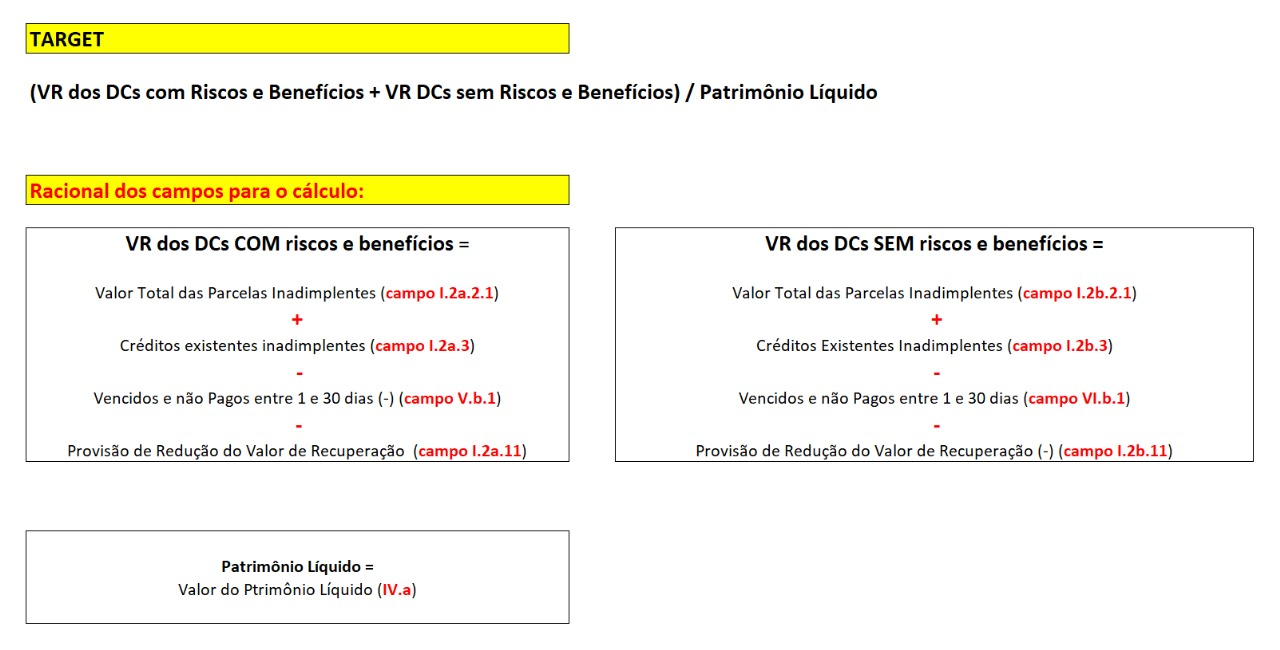

In [ ]:
# Filter values
filtered_data = df_informe_mensal[(df_informe_mensal['Carteira_Cartao_Credito'] > 1.0) & (df_informe_mensal['Carteira_Cartao_Credito'].notna())]

# Calcule VR
filtered_data['vr_sem_riscos_e_beneficios'] = (
    filtered_data['Ativo_Direitos_Sem_Aquisicao_Parcelas_Inadimplentes'] +
    filtered_data['Ativo_Direitos_Sem_Aquisicao_Creditos_Inadimplentes'] -
    filtered_data['Carteira_Direitos_Aquisicao_Inadimplentes_1_30_Dias'] -
    filtered_data['Ativo_Direitos_Sem_Aquisicao_Provisao_Reducao']
)

filtered_data['vr_com_riscos_e_beneficios'] = (
    filtered_data['Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes'] +
    filtered_data['Ativo_Direitos_Aquisicao_Creditos_Inadimplentes'] -
    filtered_data['Carteira_Direitos_Aquisicao_Inadimplentes_1_30_Dias'] -
    filtered_data['Ativo_Direitos_Aquisicao_Provisao_Reducao']
)

filtered_data['target'] = (
    filtered_data['vr_sem_riscos_e_beneficios'] +
    filtered_data['vr_com_riscos_e_beneficios']
)

# Plot graph
fig = px.scatter(
    filtered_data,
    x=filtered_data.index,
    y='target',
    title='Gráfico de Dispersão: Valores do Target',
    labels={'x': 'Índice do Registro', 'y': 'Target'},
    opacity=0.5,
    hover_name=filtered_data.index,
    hover_data={'target': ':.2f'}
)

# Show graph
fig.show()
